# Introduction to data
Some define statistics as the field that focuses on turning information into knowledge. The first step in that process is to summarize and describe the raw information – the data. In this lab we explore flights, specifically a random sample of domestic flights that departed from the three major New York City airports in 2013. We will generate simple graphical and numerical summaries of data on these flights and explore delay times. Since this is a large data set, along the way you’ll also learn the indispensable skills of data processing and subsetting.

# Getting started

## Load packages
In this lab, you will explore and visualize the data using **matplotlib.pyplot** and **seaborn** packages. You will also use the **pandas** package for handling data frames.

Let's load the packages

```python
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
```

## Creating a reproducible lab report
You will be using Jupyter notebook to create reproducible lab reports. Download the lab report template and load the template into Jupyter notebook. These templates can be used for each of the labs.

## The data
The Bureau of Transportation Statistics (BTS) is a statistical agency that is a part of the Research and Innovative Technology Administration (RITA). As its name implies, BTS collects and makes transportation data available, such as the flights data we will be working with in this lab.

Download the nycflights.csv file and load the data frame.

```python
nycflights = pd.read_csv("nycflights.csv", na_values='NaN')
```

The data set `nycflights` is a data matrix, with each row representing an observation and each column representing a variable. Python, and specifically the package **pandas**, calls this data format a data frame, which is a term that will be used throughout the labs. For this data set, each observation is a single flight.

To view the names of the variables, type the command

```python
list(nycflights.columns)
```

One of the variables refers to the carrier (i.e. airline) of the flight, which is coded according to the following two letter carrier abbreviation.

- `9E`: Endeavor Air Inc.
- `AA`: American Airlines Inc.
- `AS`: Alaska Airlines Inc.
- `B6`: JetBlue Airways
- `DL`: Delta Air Lines Inc.
- `EV`: ExpressJet Airlines Inc.
- `F9`: Frontier Airlines Inc.
- `FL`: AirTran Airways Corporation
- `HA`: Hawaiian Airlines Inc.
- `MQ`: Envoy Air
- `OO`: SkyWest Airlines Inc.
- `UA`: United Air Lines Inc.
- `US`: US Airways Inc.
- `VX`: Virgin America
- `WN`: Southwest Airlines Co.
- `YV`: Mesa Airlines Inc.

You can use the `head()` function to take a quick peek at your data to understand its contents better.
```python
nycflights.head()
```

The `nycflights` data frame is a massive trove of information. Let’s think about some questions we might want to answer with these data:

- How delayed were flights that were headed to Los Angeles?
- How do departure delays vary by month?
- Which of the three major NYC airports has the best on time percentage for departing flights?

# Analysis

## Lab report

To record your analysis in a reproducible format, you can adapt the template.

## Departure delays

Let's start by examining the distribution of departure delays of all flights with a histogram.

```python
sns.histplot(data=nycflights, x='dep_delay')
```

This function creates a histogram using the `dep_delay` variable from the `nycflights` data frame on the x-axis. The `sns` is referencing the seaborn package we loaded, specifically calling the function `histplot`. The `histplot` function can accept a variety of parameters to adjust the histogram created. For example, the shape of a histogram can change depending on how the data is split between the different bins. We can tell `histplot` how wide to make each bin:

```python
sns.histplot(data=nycflights, x='dep_delay', binwidth=15)
```

```python
sns.histplot(data=nycflights, x='dep_delay', binwidth=150)
```

<div class="alert alert-block alert-info">
<b>Exercise 1:</b> Look carefully at these three histograms. How do they compare? Are features revealed in one that are obscured in another?</div>

If you want to visualize only delays of flights headed to Los Angeles, you need to first filter the data for flights with that destination (`dest == "LAX"`) and then make a histogram of the departure delays of only those flights.

```python
lax_flights = pd.DataFrame(nycflights[(nycflights.dest == "LAX")])
sns.histplot(data=lax_flights, x='dep_delay')
```

Let's decipher these two lines of code.

- The first line of code is creating a new data frame, `lax_flights`. Python knows to create a new object, in this case a data frame, when a word or phrase is followed by a single equals sign `=`, in this case we have `lax_flights =`. On the right hand side of the equation, the dataframe `nycflights` is being filtered using `nycflights[(nycflights.dest == "LAX")]`. Inside the filter is the statement `nycflights.dest == "LAX"`. This is telling python to only include the data from the `nycflights` data frame if data has `LAX` in the `dest` column. `LAX` is in quotation marks since it is a character string, essentially just text. The **pandas** function `pd.DataFrame` is being applied to the filtered data frame, `nycflights[(nycflights.dest == "LAX")]`, in order to create the new data frame, `lax_flights`.
- The second line of code is the same `histplot` function as before, but this time using the `lax_flights` data frame.

<div class="alert alert-block alert-info">
<b>Logical operators:</b> Filtering for certain observations (e.g. flights from a particular airport) is often of interest in data frames where we might want to examine observations with certain characteristics separately from the rest of the data. To do so, you can use the filter function and a series of logical operators. The most commonly used logical operators for data analysis are as follows:

<ul>
 <li><code>==</code> means "equal to"</li>
 <li><code>!=</code> means "not equal to"</li>
 <li><code>></code> or <code><</code> means "greater than" or "less than"</li>
 <li><code>>=</code> or <code><=</code> means "greater than or equal to" or "less than or equal to"</li>
</ul></div>

You can also obtain numerical summaries for these flights:

```python
print("The mean departure delay is", lax_flights['dep_delay'].mean())
print("The median departure delay is", lax_flights['dep_delay'].median())
print("The number of observations is", len(lax_flights['dep_delay']))
```

The library **Pandas** provides a variety of functions that allow for quick access to summary statistics of data frames. Once again we are using the command `lax_flights['dep_delay']` to access specifically that variable (column) of the data frame. The first two lines are followed by `.mean()` and `.median()` respectively. These are functions built into the data frame and thus are written in this way. The last line has a different syntax. Here we use `len(lax_flights['dep_delay'])` since the function `len` or "length" is a default function of Python, instead of coming from the library **Pandas**. Each line has the command `print("text", value)`, which is telling Python to display the information in parenthesis (). Python will display any text when surrounded by quotations, for example `"The mean departure delay is"`. You can also send specific values to the print function to be displayed, for example `lax_flights['dep_delay'].mean()`. Separate items to be displayed should be separated by commas.

<div class="alert alert-block alert-info">
<b>Summary Statistics:</b> Some useful functional calls for summary statistics for a single numerical variable are as follows:

<ul>
 <li><code>data.mean()</code></li>
 <li><code>data.median()</code></li>
 <li><code>data.std()</code></li>
 <li><code>data.var()</code></li>
 <li><code>data.quantile([0.25, 0.75])</code></li>
 <li><code>data.min()</code></li>
 <li><code>data.max()</code></li>
</ul>
Note that these functions take in a column of a data frame and return a value.</div>

We can also get a report of all of these statistics at once.

```Python
lax_flights['dep_delay'].describe()
```

We can even apply this function to the entire data frame.

```Python
lax_flights.describe()
```

Let's try filtering by multiple criteria. Suppose you are interested in flights heading to San Francisco (SFO) in February:

```Python
sfo_feb_flights = nycflights[(nycflights.dest == "SFO") & (nycflights.month == 2)]
```

Note that you can separate the conditions using `&` if you want flights that are both headed to SFO <b>and</b> in February. If you are interested in either flights headed to SFO <b>or</b> in February, you can use the `|` command instead of the `&`.

<div class="alert alert-block alert-info">
<b>Exercise 2:</b> Create a new data frame that includes flights headed to SFO in February, and save this data frame as <code>sfo_feb_flights</code>. How many flights meet these criteria?</div>

<div class="alert alert-block alert-info">
<b>Exercise 3:</b> Describe the distribution of the <b>arrival</b> delays of these flights using a histogram and appropriate summary statistics. <b>Hint:</b> The summary statistics you use should depend on the shape of the distribution.</div>

Another useful technique is quickly calculating summary statistics for various groups in your data frame. For example, we can modify the above command using the `group_by` function to get the same summary stats for each origin airport:

```Python
sfo_feb_flights[['carrier', 'dep_delay']].groupby('carrier').describe()
```

Here we have restricted the data frame `sfo_feb_flights` to only include the variables `carrier` and `dep_delay`. Then we are grouping the data by the different carriers. Lastly, we apply the `describe()` function to the GroupBy object to get the summary statistics.

<div class="alert alert-block alert-info">
<b>Exercise 4:</b> Calculate the median and interquartile range for <code>arr_delays</code> of flights in the <code>sfo_feb_flights</code> data frame, grouped by <code>carrier</code>. Which carrier has the most variable arrival delays?</div>

## Departure delays by month

Which month would you expect to have the highest average delay departing from an NYC airport?

Let's think about how you could answer this question:

- First, calculate monthly averages for departure delays. With the new language you are learning, you could
    - `group_by` months, then
    - `mean()` departure delays.
- Then, you could `sort_values()` these average delays in descending order

```Python
nycflights[['month', 'dep_delay']].groupby('month').mean().sort_values('dep_delay')
```

<div class="alert alert-block alert-info">
<b>Exercise 5:</b> Suppose you really dislike departure delays and you want to schedule your travel in a month that minimizes your potential departure delay leaving NYC. One option is to choose the month with the lowest mean departure delay. Another option is to choose the month with the lowest median departure delay. What are the pros and cons of these two choices?</div>

## On time departure rate for NYC airports

Suppose you will be flying out of NYC and want to know which of the three major NYC airports has the best on time departure rate of departing flights. Also supposed that for you, a flight that is delayed for less than 5 minutes is basically "on time." You consider any flight delayed for 5 minutes of more to be "delayed".

In order to determine which airport has the best on time departure rate, you can

- first classify each flight as "on time" or "delayed",
- then group flights by origin airport,
- then calculate on time departure rates for each origin airport,
- and finally arrange the data in a readable fassion.

Let's start with classifying each flight as "on time" or "delayed" by creating a new variable with the `apply` and `lambda` functions.

```Python
nycflights['dep_type'] = nycflights.apply(lambda row: "on time" if row.dep_delay < 5 else "delayed", axis=1)
```

The function `.apply()` here has two inputs: `lambda row: "on time" if row.dep_delay < 5 else "delayed"` (a `lambda` function explained in a moment) and `axis=1` separated by a comma to indicate the separate inputs.

- The `lambda` function is a Python command to create a new function. This first considers the input `row`, then what to do with that input `"on time" if row.dep_delay < 5 else "delayed"` separated by `:`. The input is each row of the data frame. If the `dep_delay` value in that row is less than 5, then the function returns the string `"on time"`. If the `dep_delay` value int hat row is not less than 5, then the function returns the string `"delayed"`.
- The `axis=1` command tells the `apply` function to apply the function to the rows of the data frame, instead of the columns.

The `apply` function is creating a new column. The line begins with `nycflights['dep_type'] =`. The variable `dep_type` is being created as a new column, since it is previously undefined, and being assigned the values returned from the `apply` function.

We can handle all of the remaining steps in one line of code:

```Python
nycflights[['origin', 'dep_type']].groupby('origin').value_counts(normalize=True)
```

The only new function here is the `value_counts` function. This function counts the number of instances for each value in the `dep_type` columnn. There are only two values in the `dep_type` column: `"on time"` and `"delayed"`, so `value_counts` counts the number of on time flights and delayed flights, by our definition. By inputing the statement `normalize=True` to the `value_counts` function, we are telling the `value_counts` function to display the data as a percentage instead of a count.

<div class="alert alert-block alert-info">
<b>Exercise 6:</b> If you were selecting an airport simply based on on time departure percentage, which NYC airport would you choose to fly out of?</div>

---

# More Practice

<div class="alert alert-block alert-info">
<b>Exercise 7:</b> Modify the data frame so that it includes a new variable that contains the average speed, <code>avg_speed</code>, traveled by the plane for each flight (in mph). <b>Hint:</b> Average speed can be calculated as distance divided by number of hours of travel, and note that <code>air_time</code> is given in minutes.</div>

<div class="alert alert-block alert-info">
<b>Exercise 8:</b> Make a scatterplot of <code>avg_speed</code> vs. <code>distance</code>. Describe the relationship between average speed and distance. <b>Hint:</b> You will want to call the <code>scatterplot</code> function from <b>Seaborn</b>, instead of <code>histplot</code> as we did before. You can input <code>data=</code>, <code>x=</code>, and <code>y=</code> into the <code>scatterplot</code> function.</div>

<div class="alert alert-block alert-info">
<b>Exercise 9:</b> Replicate the following plot. <b>Hint:</b> The data frame plotted only contains flights from American Airlines, Delta Airlines, and United Airlines. The <code>scatterplot</code> function accepts the input <code>hue</code> to color by groups within a variable, in this case <code>carrier</code>.</div>

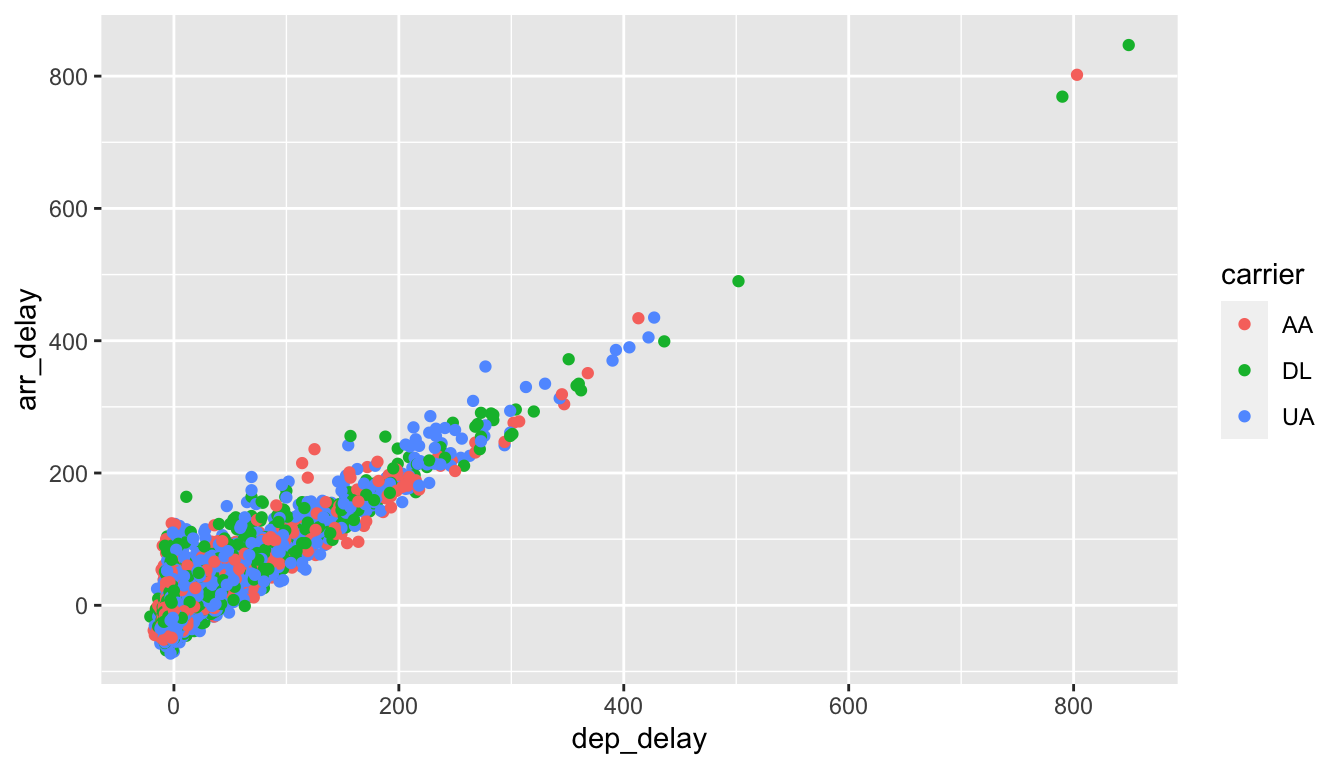

---